In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [4]:
transforms = transforms.ToTensor()

In [5]:
train_data = datasets.CIFAR10(root='data', train=True, download=True, transform= transforms)
test_data = datasets.CIFAR10(root='data', train=False, download=True, transform= transforms)

# Step 4: Class labels
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:14<00:00, 11.7MB/s]


Label index: 6
Label name: frog
Image shape: torch.Size([3, 32, 32])


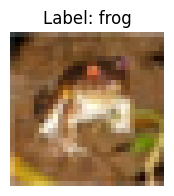

In [6]:
import matplotlib.pyplot as plt

# Get first sample
X1, y1 = train_data[0]

print("Label index:", y1)
print("Label name:", classes[y1])
print("Image shape:", X1.shape)   # (3, 32, 32)

# Convert (C, H, W) → (H, W, C) for matplotlib
img = X1.permute(1, 2, 0)

# Display image
plt.figure(figsize=(2, 2))
plt.imshow(img)
plt.title(f"Label: {classes[y1]}")
plt.axis("off")
plt.show()

In [7]:
from torch.utils.data import Dataset, DataLoader

train_loader = DataLoader(train_data, batch_size=20, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_data, batch_size=20, shuffle=False, pin_memory=True)

In [8]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()

        # Features extractor
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),   # (3,32,32) -> (64,32,32)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),  # (64,32,32) -> (64,32,32)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2,2),                            # (64,32,32) -> (64,16,16)
            nn.Dropout(p=0.4),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1), # (64,16,16) -> (128,16,16)
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),# (128,16,16) -> (128,16,16)
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2,2),                            # (128,16,16) -> (128,8,8)
            nn.Dropout(p=0.4),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),# (128,8,8) -> (256,8,8)
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),# (256,8,8) -> (256,8,8)
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2,2),                            # (256,8,8) -> (256,4,4)
            nn.Dropout(p=0.4),
            #nn.AdaptiveAvgPool2d((1,1))                   # (256,8,8) -> (256,1,1)
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),                                 # (256,1,1) -> (256,)
            nn.Linear(4096, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(),
            nn.Dropout(p=0.4),
            nn.Linear(4096, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(p=0.4),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [14]:
learning_rate = 0.01
epochs = 30

In [15]:
import torch.optim as optim

model = CNN()

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4)

In [16]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

Epoch: 1 , Loss: 1.5630224161863326
Epoch: 2 , Loss: 1.1970620891928674
Epoch: 3 , Loss: 1.0234321266293527
Epoch: 4 , Loss: 0.9183513188004494
Epoch: 5 , Loss: 0.8472734438896179
Epoch: 6 , Loss: 0.7876310284018516
Epoch: 7 , Loss: 0.7529552233099938
Epoch: 8 , Loss: 0.7065902921915055
Epoch: 9 , Loss: 0.672207541257143
Epoch: 10 , Loss: 0.6493837066590786
Epoch: 11 , Loss: 0.6181631691634655
Epoch: 12 , Loss: 0.5923437469393015
Epoch: 13 , Loss: 0.5743313847720622
Epoch: 14 , Loss: 0.5505034911334514
Epoch: 15 , Loss: 0.5366192047715187
Epoch: 16 , Loss: 0.5187383843243122
Epoch: 17 , Loss: 0.5041600698858499
Epoch: 18 , Loss: 0.4875552383437753
Epoch: 19 , Loss: 0.472312688344717
Epoch: 20 , Loss: 0.461401059871912
Epoch: 21 , Loss: 0.44710847911536694
Epoch: 22 , Loss: 0.43813102925419806
Epoch: 23 , Loss: 0.4164539735302329
Epoch: 24 , Loss: 0.41328920853585005
Epoch: 25 , Loss: 0.4017792854145169
Epoch: 26 , Loss: 0.39238107276186346
Epoch: 27 , Loss: 0.3845871129140258
Epoch: 28

In [17]:
model.eval()

# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8778


In [18]:
# evaluation on training data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.95882
